# Xue & Leibler, PNAS 2016

At each generation:

1. individuals develop a phenotype according to their phenotype distribution $\pi$: $\pi_i \in [0,1]$ is the probability that a specific individual will develop to phenotype $\phi_i$.
1. the fitness of individuals is set according to their phenotype and the environment $\epsilon \in {0, 1}$.
. individuals reproduce: the relative contribution (fitness) of individuals with phenotype $\phi_i$ in environment $\epsilon_j$ to the next generation is $\frac{\omega_i^{(j)}}{\sum_k{\phi_k^j}}$.
1. each offspring phenotype distribution is inherited from its parent, where a fraction $1-\eta$ is determined according to the parent phenotype distribution and a fraction $\eta$ is determined according to the parent phenotype; the offspring distribution is $\pi_i' = (1-\eta)\phi_i + \eta * \delta_{i,k}$, where $k$ is the parent phenotype.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)
from simulation import *

# Figure 2

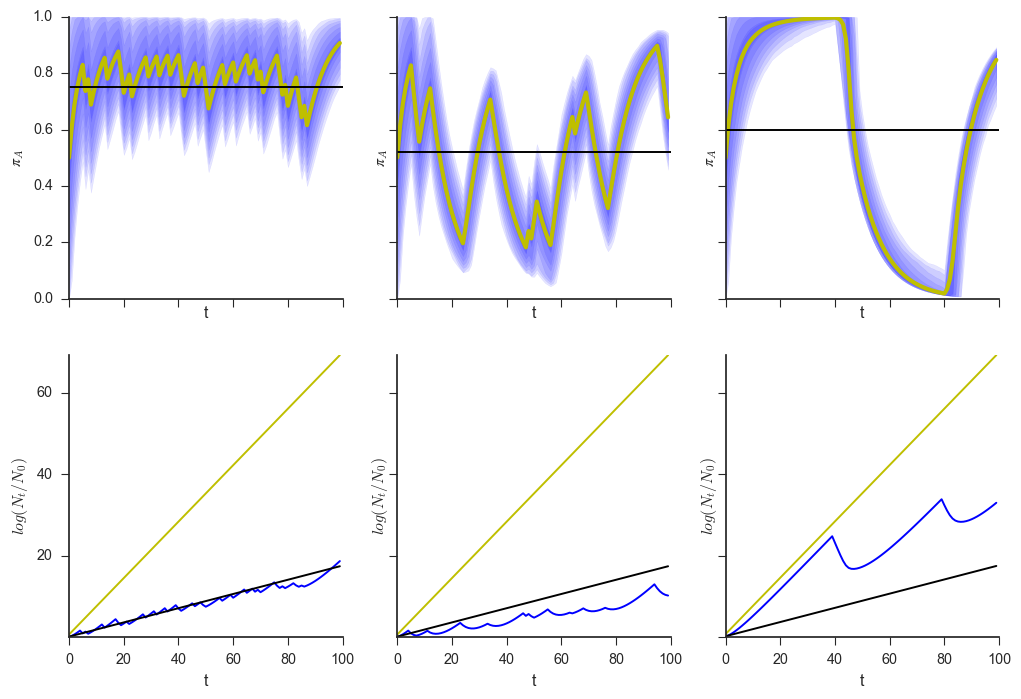

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey='row')

N=100000
n=100
η=0.1
μ=0
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π = simulation(N, n, η, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_logNtN0(π, ω0, ω1, 0.7, ϵ, ax=ax[1,0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π = simulation(N, n, η, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0,1])
plot_logNtN0(π, ω0, ω1, 0.7, ϵ, ax=ax[1,1])

## Fig. 2C
ϵ = np.array([0] * 40 + [1] * 40 + [0] * 20)
π = simulation(N, n, η, μ, ω0, ω1, π0, ϵ)
plot_π(π, ϵ, ax=ax[0,2])
plot_logNtN0(π, ω0, ω1, 0.7, ϵ, ax=ax[1,2]);

# Modifier competitions in Fig. 2

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(16, 8), sharex=True, sharey='row')

N=100000
n=500
η1=0.1
η2=0
μ1=0
μ2=0.1
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5
κ = 0

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π, η_bar, μ_bar= simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_η(η_bar, η1, η2, ax=ax[1, 0])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 1])
plot_η(η_bar, η1, η2, ax=ax[1, 1])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 1])

## Fig. 2C
ϵ = np.array(([0] * 40 + [1] * 40) * (n//80 + 1))
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 2])
plot_η(η_bar, η1, η2, ax=ax[1, 2])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 2])

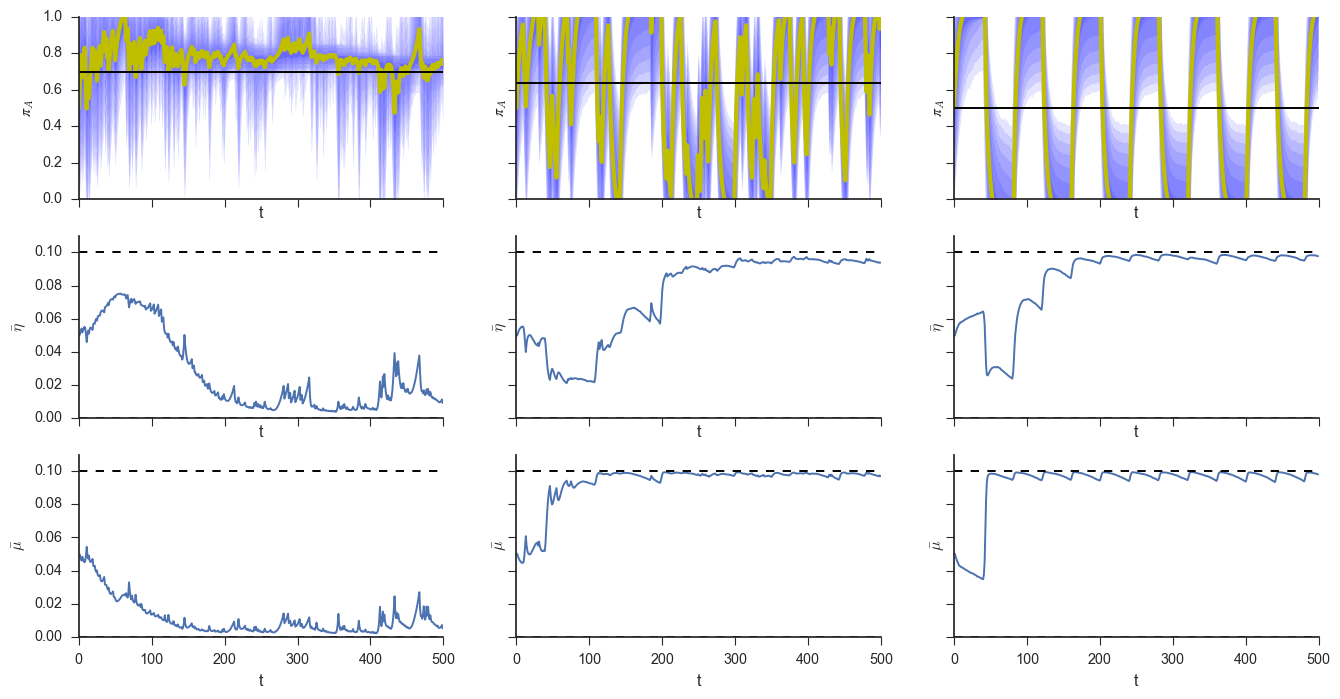

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(16, 8), sharex=True, sharey='row')

N=100000
n=500
η1=0.1
η2=0
μ1=0
μ2=0.1
ω0=2
ω1=0.2
π0=0.5
p0 = 0.5
κ = 0.001

## Fig. 2A
ϵ = np.random.choice(2, n, True, [0.7, 0.3])
π, η_bar, μ_bar= simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 0])
plot_η(η_bar, η1, η2, ax=ax[1, 0])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 0])

## Fig. 2B
ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 1])
plot_η(η_bar, η1, η2, ax=ax[1, 1])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 1])

## Fig. 2C
ϵ = np.array(([0] * 40 + [1] * 40) * (n//80 + 1))
π, η_bar, μ_bar = simulation_modifiers(N, n, η1, η2, μ1, μ2, ω0, ω1, π0, κ, ϵ)
plot_π(π, ϵ, ax=ax[0, 2])
plot_η(η_bar, η1, η2, ax=ax[1, 2])
plot_μ(μ_bar, μ1, μ2, ax=ax[2, 2])

## Multiple simulations

Simuations ran with:

```
python simulation.py --N 100000 --n 500 --η1 0.1 --η2 0.2 --ω0 2.0 --ω1 0.2  --π0 0.5  --env A
```
and results were saved to `output` folder.

In [7]:
import glob
import os
import gzip
import warnings
import json

In [8]:
πs = []
for filename in glob.glob(os.path.join('output1', 'π_*')):
    with gzip.open(filename, 'r') as f:
        πs.append( np.loadtxt(f, delimiter=', ') )
πs = np.array(πs)

In [9]:
ϵs = []
for filename in glob.glob(os.path.join('output1', 'ϵ_*')):
    with gzip.open(filename, 'r') as f:
        ϵs.append( np.loadtxt(f, delimiter=', ', dtype=float) )

In [10]:
ηs = []
for filename in glob.glob(os.path.join('output1', 'η_*')):
    with gzip.open(filename, 'r') as f:
        ηs.append( np.loadtxt(f, delimiter=', ') )    
ηs = np.array(ηs)

In [11]:
params = []
for filename in glob.glob(os.path.join('output1', 'params_*')):
    with open(filename, 'r') as f:
        params.append( json.load(f) )

In [12]:
envs = np.array([p['env'] for p in params])
η1s = np.array([float(p['η1']) for p in params])
η2s = np.array([float(p['η2']) for p in params])

In [13]:
assert len(np.unique(η1s)) == 1
assert len(np.unique(η2s)) == 1
η1 = η1s[0]
η2 = η2s[0]

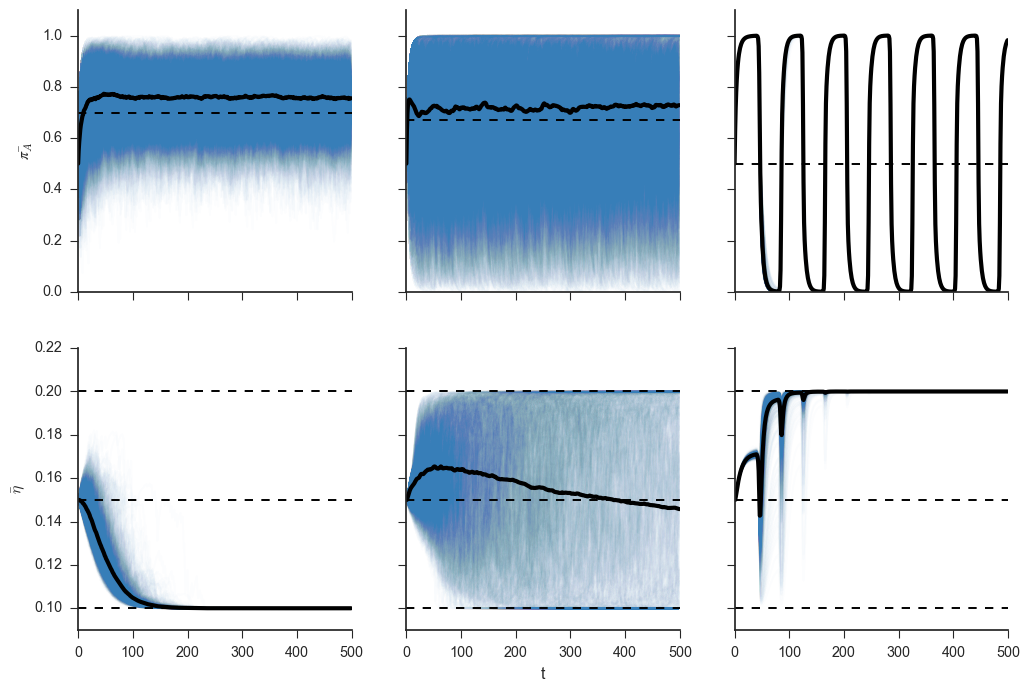

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey='row')

for i, env in enumerate(('A', 'B', 'C')):
    ax[0, i].plot(πs[envs==env, :].T, color=blue, alpha=0.01)
    ax[0, i].plot(πs[envs==env, :].mean(axis=0), lw=3, color='k', ls='-')
    p0 = np.mean([1 - x.mean() for i, x in enumerate(ϵs) if envs[i] == env])
    ax[0, i].axhline(p0, color='k', ls='--')
    ax[1, i].plot(ηs[envs==env, :].T, color=blue, alpha=0.01)
    ax[1, i].plot(ηs[envs==env, :].mean(axis=0), lw=3, color='k', ls='-')
    ax[1, i].axhline(η1, color='k', ls='--')
    ax[1, i].axhline(η2, color='k', ls='--')
    ax[1, i].axhline((η1 + η2)/2, color='k', ls='--')
ax[0,0].set(
    ylim=(0, 1.1),
    ylabel=r'$\bar{π_A}$'
)
ax[1,0].set(
    ylabel=r'$\bar{\eta}$',
    ylim=(0.9 * η1, η2 * 1.1)
)
ax[1,1].set(
    xlabel='t'
)
sns.despine()

In [92]:
fig.savefig("modifier_competition_1000.png")

## Using pandas and seaborn...

In [3]:
import glob
import os
import json
import gzip

In [4]:
dfs = []
output_folder = 'output1'
for filename in glob.glob(os.path.join(output_folder, 'params*json')):
    filename = os.path.split(filename)[-1]
    filename = filename.replace('params_', '').replace('.json', '')
    params = read_json(output_folder, filename)
    π = read_csv_gz(output_folder, filename, 'π')
    ϵ = read_csv_gz(output_folder, filename, 'ϵ')
    η = read_csv_gz(output_folder, filename, 'η')
#     μ = read_csv_gz(output_folder, filename, 'μ')
    t = np.arange(len(π))
    ϵ = ϵ[:len(t)]
    dfs.append(pd.DataFrame(dict(ID=filename, t=t, π=π, ϵ=ϵ, η=η,  **params)))# μ=μ,

In [5]:
df = pd.concat(dfs)
df.shape

(1499000, 13)

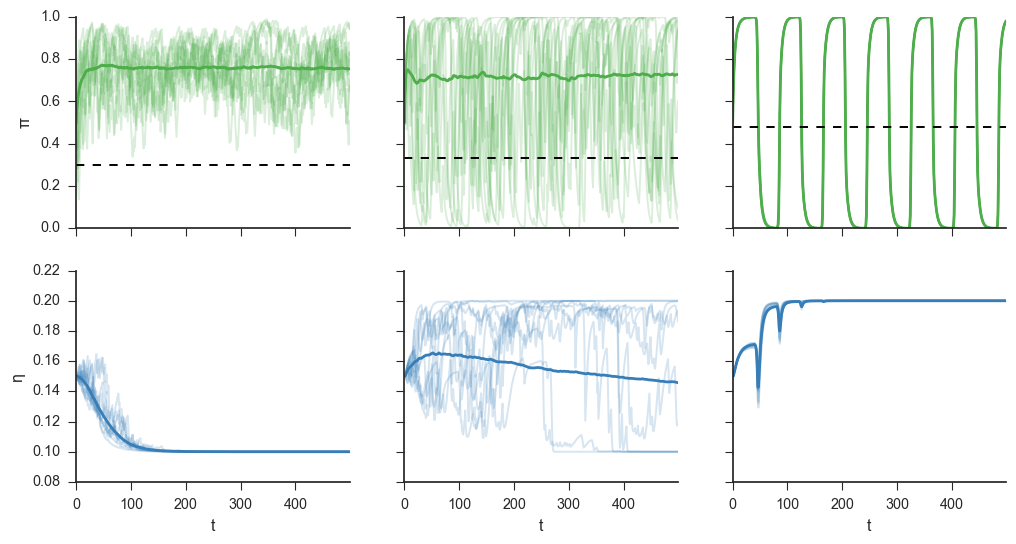

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,6))
samples = 10
red, green, blue = sns.color_palette('Set1', 3)
for i, env in enumerate(('A', 'B', 'C')):
    _df = df[df.env == env]
    ids = np.random.choice(_df.ID.unique(), samples)
    grp = _df[_df.ID.isin(ids)].groupby('ID')
    sns.tsplot(_df, time='t', unit='ID', value='π', lw=2, color=blue, ci=False, ax=ax[0, i])
    grp.plot('t', 'π', color=blue, alpha=2/samples, ax=ax[0, i])
    sns.tsplot(_df, time='t', unit='ID', value='η', lw=2, color=green, ci=False, ax=ax[1, i])
    grp.plot('t', 'η', color=green, alpha=2/samples, ax=ax[1, i])
#     sns.tsplot(_df, time='t', unit='ID', value='μ', lw=2, color=red, ci=False, ax=ax[2, i])
#     grp.plot('t', 'μ', color=red, alpha=0.02, ax=ax[2, i])
    ax[0, i].axhline(_df.ϵ.mean(), color='k', ls='--')
    ax[0, i].legend().set_visible(False)
    ax[1, i].legend().set_visible(False)
#     ax[2, i].legend().set_visible(False)

sns.despine()

# Diversity

In [2]:
def isogenic(N):
    x = np.ones(N) * 0.5
    return x

In [3]:
ε = np.array([0]*50+[1]*50+[0]*50+[1]*50+[0]*50+[1]*50+[0]*50+[1]*50)
π = simulation(10000, 400, 0.1, 0, 2.0, 0.2, 0.5, ε)

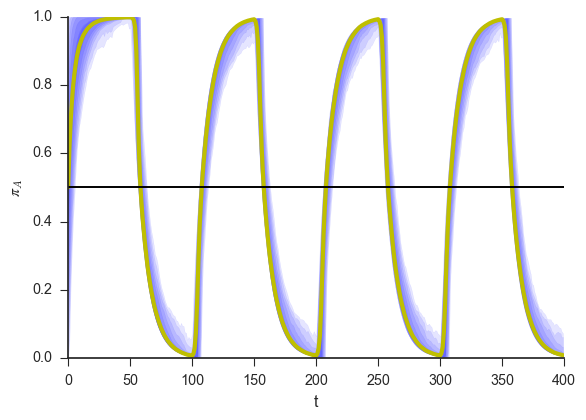

In [4]:
plot_π(π, ε);

In [37]:
def shannon(x):
    """Calculates Shannon Index: -sum_k{log(p_k) p_k} where k are value in input array x and p_k are frequencies of k in x.
    
    Parameters
    ----------
    x : np.ndarray
        array of values
        
    Returns
    -------
    float
        the shannon index
    """
    freqs = (np.unique(x).reshape(-1, 1) == x).mean(axis=1)
    nonzero_freqs = freqs[freqs.nonzero()]
    return -(nonzero_freqs * np.log(nonzero_freqs)).sum()

In [ ]:
shannon_idx = [shannon(π[t,:]) for t in range(π.shape[0])]

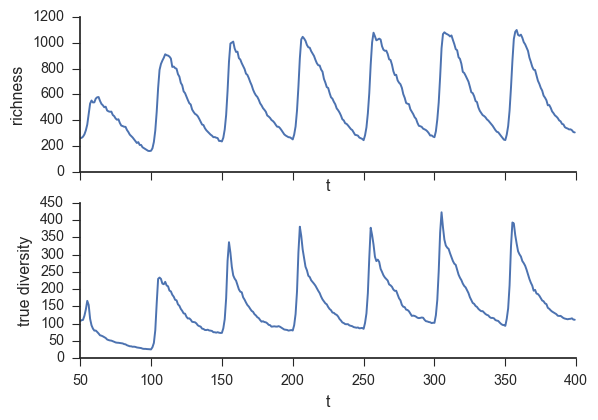

In [44]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
ax[0].plot(range(50, π.shape[0]), [len(np.unique(π[i,:])) for i in range(50, π.shape[0])])
ax[0].set(xlabel=('t'), ylabel=('richness'))
ax[1].plot(range(50, π.shape[0]), np.exp(shannon_idx[50:]))
ax[1].set(xlabel=('t'), ylabel=('true diversity'))
sns.despine()

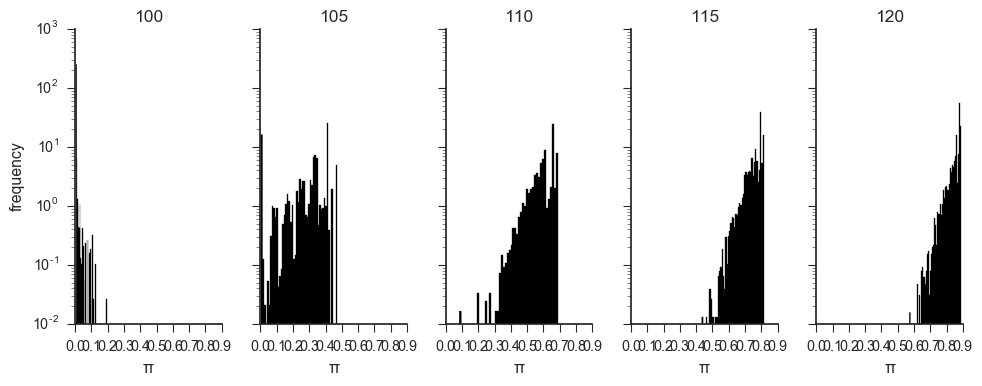

In [22]:
fig, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10, 4)) 
bins = 50
for ax, t in zip(axes, [100,105,110,115,120]):
    ax.hist(π[t, :], bins=bins, color='k', normed=True, cumulative=False)
    ax.set(xlabel='π', title=t)
axes[0].set(ylabel='frequency', yscale='log')
fig.tight_layout()
sns.despine()

# Frequency based simulation

Specifics are in the [model description file](model.md).
The recurrence equation is:

$$
\bar{\omega}(t) \cdot  f_{t+1}(\pi) =
f_{t}\big( \frac{\pi-\eta}{1-\eta} \big) \cdot \frac{\pi-\eta}{1-\eta} \cdot \omega_A^{\epsilon(t)} + 
f_{t}\big( \frac{\pi}{1-\eta} \big) \cdot \big( 1- \frac{\pi}{1-\eta} \big) \cdot \omega_B^{\epsilon(t)}
$$

where $\bar{\omega}(t)$ is the integral of the right hand side over $0 \le \pi \le 1$.

In [270]:
def deterministic(N, n, η, μ, ω0, ω1, π0, ϵ=None):
    π = [None] * n
    f = [None] * n
    π[0] = [π0]
    f[0] = [1]

    for t in range(1, n):
        ω0_ = ω0 * (ϵ[t]==0) + ω1 * (ϵ[t]==1)
        ω1_ = ω0 * (ϵ[t]==1) + ω1 * (ϵ[t]==0)

        π_ = [x * (1 - η) + η for x in π[t-1]] + [x * (1 - η) for x in π[t-1]]
        f_ = [
            f[t-1][i] * x * ω0_
            for i, x in enumerate(π[t-1])
        ] + [
            f[t-1][i] * (1 - x) * ω1_
            for i, x in enumerate(π[t-1])
        ]

        fsum = np.sum(f_)
        π[t] = [x for i, x in enumerate(π_) if (f_[i]/fsum) > (1/N)]
        f_ = [x for x in f_ if (x/fsum) > (1/N)]
        fsum = np.sum(f_)
        f[t] = [x/fsum for x in f_]

        assert len(f[t]) == len(π[t])
        assert all((0 <= x <= 1 for x in f[t]))
        assert all((0 <= x <= 1 for x in π[t]))
    return π, f

In [275]:
N=100000
n=100
η=0.1
μ=0
ω0=2
ω1=0.2
π0=0.5

ϵ1 = np.random.choice(2, n, True, [0.7, 0.3])

ϵ, a = np.zeros(n, dtype=int), 0
while a < ϵ.size:
    a += np.random.geometric(1/10)
    g = np.random.geometric(1/5)
    ϵ[a: a + g] = 1
    a += g
ϵ2 = ϵ

ϵ3 = np.array(([0] * 40 + [1] * 40) * (n//80 + 1))

π1, f1 = deterministic(N, n, η, μ, ω0, ω1, π0, ε1)
π2, f2 = deterministic(N, n, η, μ, ω0, ω1, π0, ε2)
π3, f3 = deterministic(N, n, η, μ, ω0, ω1, π0, ε3)

In [281]:
def plot_π_deterministic(π, f, ϵ, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    m = [0] * n
    for t, π_, f_ in zip(range(n), π, f):
        l = []
        for x, p in zip(π_, f_):
            l += [x] * int(p*N)
            m[t] += x * p
        ax.plot([t]* len(l), l, '.b', alpha=0.005)

    ax.plot(range(n), m, c='y', lw=3)
    ax.axhline((ϵ==0).mean(), color='k')
    ax.set(
        ylim=(0, 1),
        ylabel='$π_A$',
        xlabel='t'
    )
    ax.set_clip_on(False)
    sns.despine()
    return ax

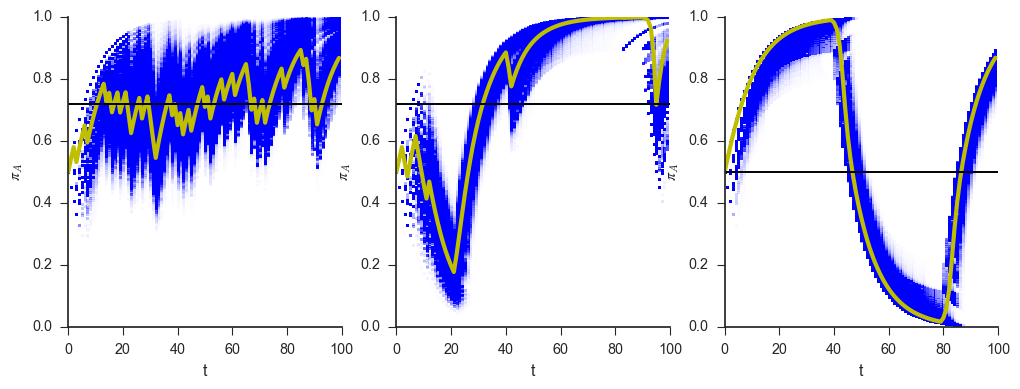

In [282]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

plot_π_deterministic(π1, f1, ϵ1, ax=ax[0])
plot_π_deterministic(π2, f2, ϵ1, ax=ax[1])
plot_π_deterministic(π3, f3, ϵ3, ax=ax[2]);